In [1]:
import os
import librosa
import numpy as np

from PIL import Image
from numpy import asarray

genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 
          'jazz', 'metal', 'pop', 'reggae', 'rock']

# audio_files = {}
mel_specs = []

# for g in genres:
#   audio_files[g] = []

for g in genres:
  for image_name in os.listdir(f'./genres_images/{g}'):
    img = Image.open(f'./genres_images/{g}/{image_name}')

    numpy_data = asarray(img)[0]
    mel_specs.append(numpy_data)

X = np.array(mel_specs)

In [2]:
print(X)

[[[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 ...

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]]


In [3]:
y_cnn = []
for i in range(len(genres)):
  y_cnn += 100*[i] # On a 100 images pour chaque genre

y_cnn = np.array(y_cnn)

In [4]:
import tensorflow as tf
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

y_cnn = to_categorical(y_cnn)
y_cnn = y_cnn[:-1] # TODO: fix

print(X.shape)
print(y_cnn.shape)
x_cnn_train, x_cnn_test, y_cnn_train, y_cnn_test = train_test_split(X, y_cnn, test_size=0.2)

2023-08-08 16:00:12.353759: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-08 16:00:12.393417: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-08 16:00:12.394120: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-08 16:00:12.986307: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


(999, 432, 4)
(999, 10)


In [5]:
# Nomralisation ?

In [6]:
print(x_cnn_train.shape)
print(x_cnn_test.shape)

(799, 432, 4)
(200, 432, 4)


In [7]:
x_cnn_train = x_cnn_train.reshape(x_cnn_train.shape[0], 432, 4, 1)
x_cnn_test = x_cnn_test.reshape(x_cnn_test.shape[0], 432, 4, 1)

In [8]:
print(x_cnn_train.shape)
print(y_cnn_train.shape)

(799, 432, 4, 1)
(799, 10)


In [9]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(432, 4, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 430, 2, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 215, 1, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 3440)              0         
                                                                 
 dense (Dense)               (None, 64)                220224    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 221034 (863.41 KB)
Trainable params: 221034 (863.41 KB)
Non-trainable params: 0 (0.00 Byte)
________________

2023-08-08 16:00:14.037625: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-08 16:00:14.038048: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [10]:
import tensorflow

optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.00001)

model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)

In [11]:
history = model.fit(x_cnn_train,
                    y_cnn_train,
                    epochs=25,
                    validation_data = (x_cnn_test,y_cnn_test))

Epoch 1/25


25/25 [==============================] - 1s 11ms/step - loss: 62.9579 - accuracy: 0.1039 - val_loss: 39.0594 - val_accuracy: 0.1150
Epoch 2/25
25/25 [==============================] - 0s 6ms/step - loss: 32.4674 - accuracy: 0.1014 - val_loss: 21.6585 - val_accuracy: 0.1150
Epoch 3/25
25/25 [==============================] - 0s 5ms/step - loss: 17.2050 - accuracy: 0.1051 - val_loss: 10.7361 - val_accuracy: 0.1000
Epoch 4/25
25/25 [==============================] - 0s 5ms/step - loss: 8.5309 - accuracy: 0.0876 - val_loss: 4.6576 - val_accuracy: 0.1100
Epoch 5/25
25/25 [==============================] - 0s 5ms/step - loss: 4.0942 - accuracy: 0.0976 - val_loss: 2.6523 - val_accuracy: 0.1150
Epoch 6/25
25/25 [==============================] - 0s 5ms/step - loss: 2.4698 - accuracy: 0.0889 - val_loss: 2.3256 - val_accuracy: 0.1150
Epoch 7/25
25/25 [==============================] - 0s 5ms/step - loss: 2.4142 - accuracy: 0.0814 - val_loss: 2.3767 - val_accuracy: 0.0750
Epoch 8/25
25/25 [======

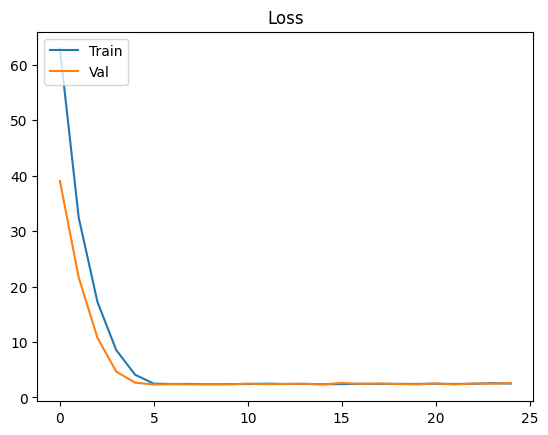

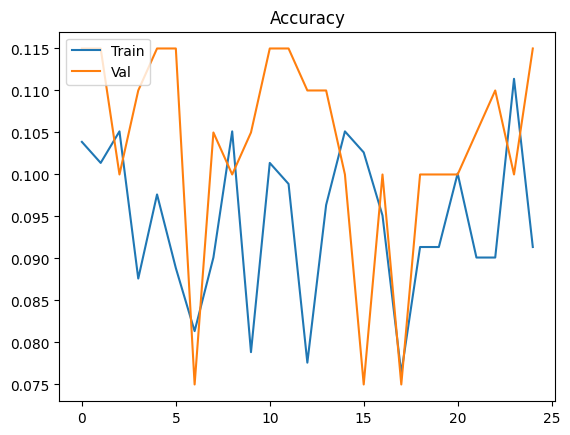

In [12]:
import matplotlib.pyplot as plt

loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()